##Data Preprocessing & Feature Engineering

In [ ]:
# Basic setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For deployment
import joblib


In [ ]:
from google.colab import files
uploaded = files.upload()

# Load data
df = pd.read_csv('/content/drive/MyDrive/Dataset ML /coin_gecko_2022-03-16.csv')
df = pd.read_csv('/content/drive/MyDrive/Dataset ML /coin_gecko_2022-03-17.csv')
df.head()


Saving coin_gecko_2022-03-17.csv to coin_gecko_2022-03-17 (1).csv
Saving coin_gecko_2022-03-16.csv to coin_gecko_2022-03-16.csv


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load both datasets
df1 = pd.read_csv('/content/drive/MyDrive/Dataset ML /coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dataset ML /coin_gecko_2022-03-17.csv')

# Optionally merge both datasets (if needed) - for example, concatenating them vertically
df = pd.concat([df1, df2], ignore_index=True)

# Preview the original column names
print("Original columns:", df.columns.tolist())

# Normalize column names for consistency
df.columns = df.columns.str.lower()

# Check if 'date' column exists before converting
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date').reset_index(drop=True)
else:
    raise ValueError("No 'date' column found in dataset.")

# Define the columns to scale (based on your dataset's actual columns)
scaled_cols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap']

# Check for presence of all required columns before scaling
missing_cols = [col for col in scaled_cols if col not in df.columns]
if missing_cols:
    raise KeyError(f"The following required columns are missing from the dataset: {missing_cols}")
else:
    # Normalize selected columns
    scaler = MinMaxScaler()
    df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
    print("Scaling complete.")

# Final preview
print("Processed DataFrame:")
print(df.head())


Original columns: ['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']
Scaling complete.
Processed DataFrame:
             coin  symbol         price        1h       24h        7d  \
0         Bitcoin     BTC  9.913189e-01  0.908636  0.552739  0.118660   
1  Iron Bank EURO   IBEUR  2.620261e-05  0.881101  0.524939  0.109756   
2       Prometeus    PROM  1.931229e-04  0.902378  0.534751  0.110918   
3    MaidSafeCoin    MAID  7.155253e-06  0.909887  0.536386  0.116725   
4    Bezoge Earth  BEZOGE  3.801804e-14  0.896120  0.524121  0.100077   

     24h_volume   mkt_cap       date  
0  6.108705e-01  0.993446 2022-03-16  
1  1.644225e-06  0.000083 2022-03-16  
2  1.845794e-05  0.000083 2022-03-16  
3  5.250232e-08  0.000086 2022-03-16  
4  3.269217e-06  0.000087 2022-03-16  


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset ML /coin_gecko_2022-03-16.csv')

# Normalize column names for consistency
df.columns = df.columns.str.lower()

# Check the available columns to make sure you're referencing the correct ones
print("Available columns:", df.columns.tolist())

# Create Moving Averages
df['ma_7'] = df['price'].rolling(window=7).mean()  # Using 'price' column
df['ma_14'] = df['price'].rolling(window=14).mean()  # Using 'price' column

# Volatility (7-day rolling standard deviation of price changes)
df['price_change'] = df['price'].diff()  # Calculate daily price changes
df['volatility'] = df['price_change'].rolling(window=7).std()  # 7-day rolling volatility

# Liquidity Proxy (volume / price volatility)
df['liquidity_ratio'] = df['24h_volume'] / (df['volatility'] + 1e-9)  # Using '24h_volume' for liquidity

# Drop nulls after rolling operations
df.dropna(inplace=True)

# Preview the final DataFrame
print("Processed DataFrame:")
print(df.head())


Available columns: ['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']
Processed DataFrame:
               coin symbol         price     1h    24h     7d   24h_volume  \
13         TerraUSD    UST      1.000000 -0.001  0.003  0.001  742209053.0   
14        Shiba Inu   SHIB      0.000022  0.024  0.028 -0.021  546344871.0   
15  Wrapped Bitcoin   WBTC  40820.440000  0.020  0.030  0.055  443045583.0   
16           Cronos    CRO      0.401575  0.018  0.043  0.038   99233479.0   
17          Polygon  MATIC      1.440000  0.029  0.034 -0.000  665458992.0   

         mkt_cap        date         ma_7        ma_14  price_change  \
13  1.502546e+10  2022-03-16    25.827117  3161.456051      0.884340   
14  1.218610e+10  2022-03-16    13.597120   242.923195     -0.999978   
15  1.107764e+10  2022-03-16  5844.970812  2962.639624  40820.439978   
16  1.010857e+10  2022-03-16  5842.378180  2962.596879 -40820.038425   
17  9.860944e+09  2022-03-16  5832.056751  2935.311

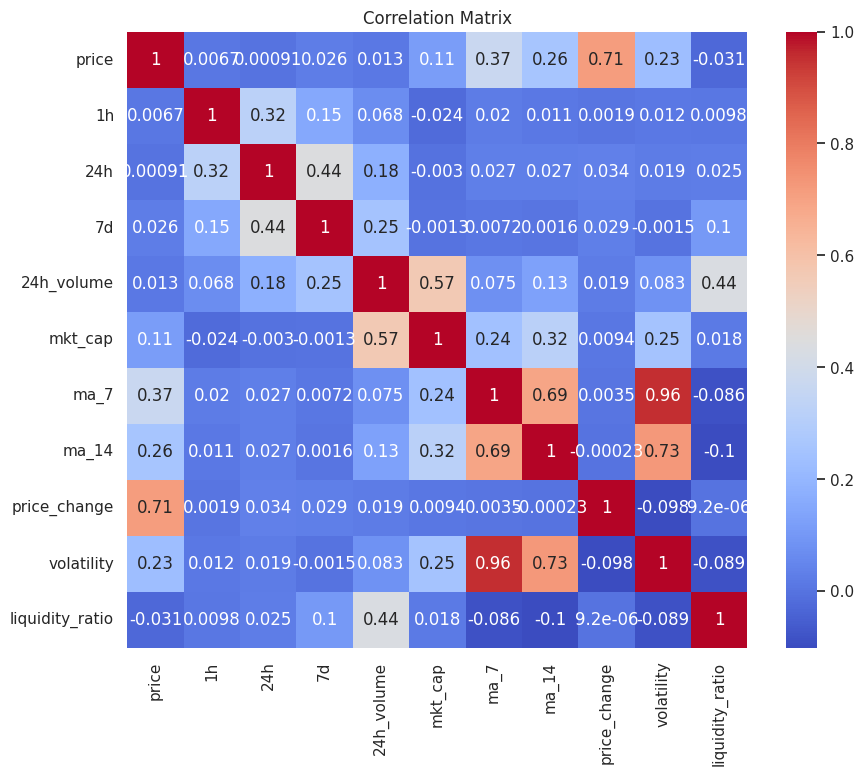

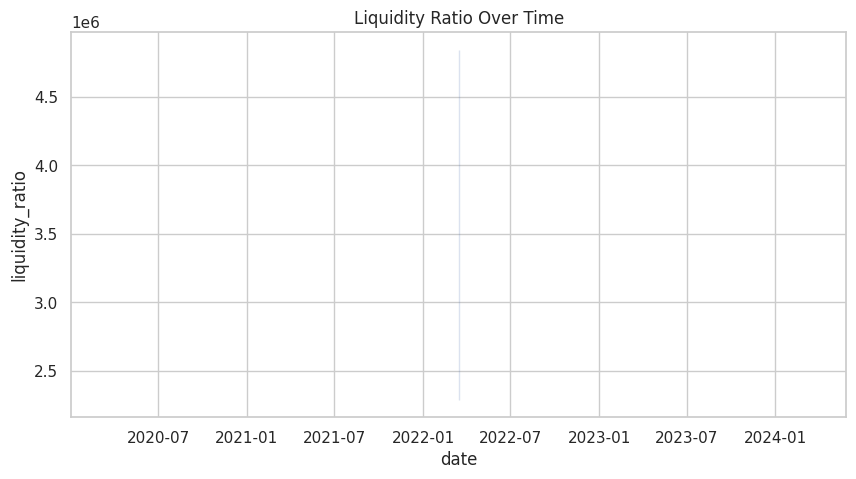

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation matrix
numeric_cols = df.select_dtypes(include=['number']).columns

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Volume vs Liquidity Ratio (Ensure 'date' column is in datetime format)
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='date', y='liquidity_ratio')
plt.title("Liquidity Ratio Over Time")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Ensure that 'price' column is used for calculations since 'close' doesn't exist
df['MA_7'] = df['price'].rolling(window=7).mean()
df['MA_14'] = df['price'].rolling(window=14).mean()
df['volatility'] = df['price'].rolling(window=7).std()

# Ensure there are no missing values after rolling calculations
df.dropna(inplace=True)

# Define features and target
features = ['MA_7', 'MA_14', 'volatility', '24h_volume']  # Replace 'volume' with '24h_volume' based on your columns
target = 'liquidity_ratio'

# Check if the features are available in the DataFrame
print("Available columns for feature selection:", df.columns.tolist())

# Split data into X (features) and y (target)
X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the split data to confirm
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Available columns for feature selection: ['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date', 'ma_7', 'ma_14', 'price_change', 'volatility', 'liquidity_ratio', 'MA_7', 'MA_14']
Training set size: (376, 4)
Test set size: (95, 4)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 14770424.131305382
MAE: 2732019.8358508055
R² Score: -4.094336406242418


In [ ]:
joblib.dump(model, 'liquidity_model.pkl')


['liquidity_model.pkl']

In [ ]:
with open("app.py", "w") as f:
    f.write("""
import joblib
import streamlit as st
import numpy as np

model = joblib.load('liquidity_model.pkl')

st.title("Cryptocurrency Liquidity Predictor")

ma_7 = st.number_input("7-Day Moving Avg")
ma_14 = st.number_input("14-Day Moving Avg")
volatility = st.number_input("Volatility")
volume = st.number_input("Volume")

if st.button("Predict Liquidity"):
    features = np.array([[ma_7, ma_14, volatility, volume]])
    prediction = model.predict(features)
    st.success(f"Predicted Liquidity Ratio: {prediction[0]:.4f}")
""")


In [ ]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd

st.title('My Streamlit App')

# Create a simple DataFrame for display
data = {'Name': ['A', 'B', 'C'], 'Age': [23, 45, 35]}
df = pd.DataFrame(data)

st.write(df)


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Use your ngrok authentication token here
ngrok.set_auth_token('2voo3FK1TbanDjKKBVf7GHX04z2_6DzQ1aCGemLWRZDMgjwCn')

# Create a tunnel to Streamlit app (which runs on port 8501)
public_url = ngrok.connect(8501)
print('Public URL:', public_url)


Public URL: NgrokTunnel: "https://628f-34-91-194-244.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pip install flask
!pip install pyngrok


In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    return jsonify({'prediction': 'value'})


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Set up a tunnel to the Flask app
public_url = ngrok.connect(5000)  # Port should be an integer, not a string
print('Public URL:', public_url)

# Run the Flask app in the background
!flask run --host=0.0.0.0 --port=5000 &


Public URL: NgrokTunnel: "https://f564-34-91-194-244.ngrok-free.app" -> "http://localhost:5000"
 * Debug mode: off
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
Press CTRL+C to quit
127.0.0.1 - - [16/Apr/2025 16:30:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Apr/2025 16:30:58] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [16/Apr/2025 16:34:51] "GET / HTTP/1.1" 200 -
